Задание 1. Разведочный анализ

    Загрузите Titanic или любой другой CSV из открытых источников.

    Выберите 3–5 признаков, которые могут влиять на результат.

    Сделайте визуализацию (Seaborn) и опишите свои наблюдения (1–2 абзаца).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic = pd.read_csv(url)

print("Размер датасета:", titanic.shape)

Размер датасета: (891, 12)


In [ ]:
#выбираем признаки для анализа
selected_features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Survived']
titanic_clean = titanic[selected_features].copy()

#заполняем пропуски в Age медианным значением, удаляем строки с пропусками в Embarked
titanic_clean['Age'] = titanic_clean['Age'].fillna(titanic_clean['Age'].median())
titanic_clean = titanic_clean.dropna(subset=['Embarked'])

print("\nПропущенные значения после очистки:")
print(titanic_clean.isnull().sum())
print(f"\nРазмер датасета после очистки: {len(titanic_clean)}")

Пропущенные значения до очистки:
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Survived      0
dtype: int64

Пропущенные значения после очистки:
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Survived    0
dtype: int64

Размер датасета после очистки: 889


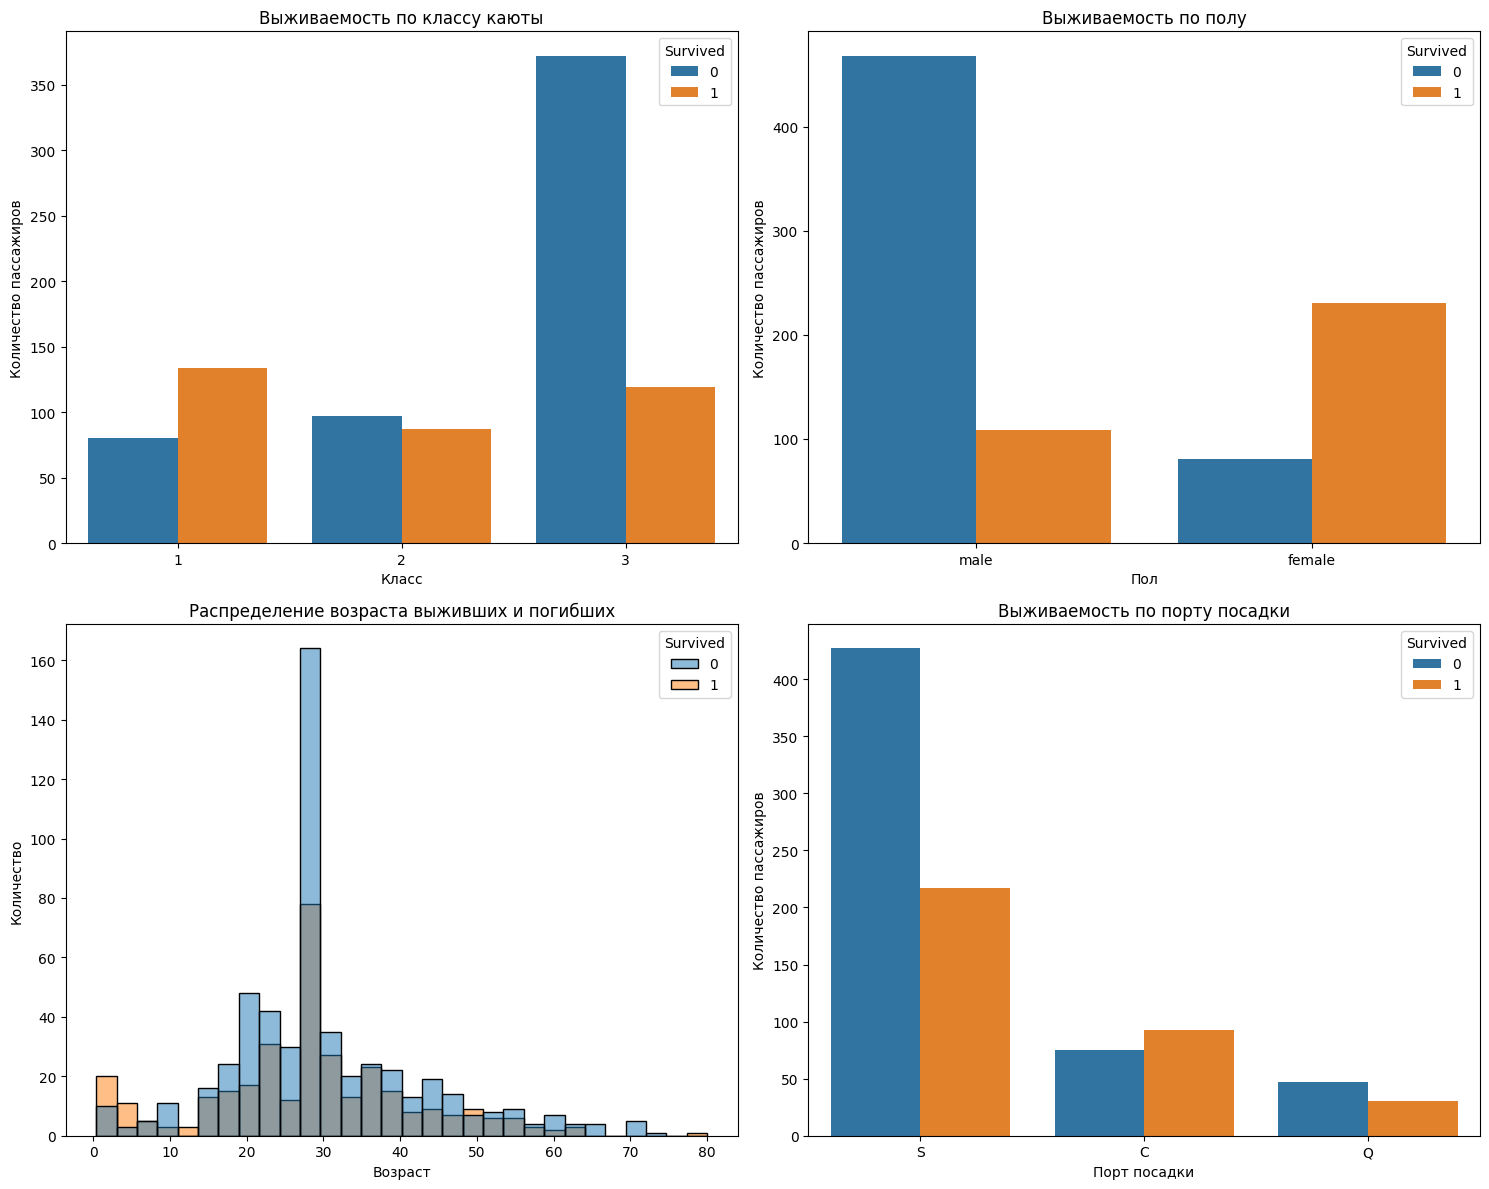

In [3]:
# Визуализация данных
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Выживаемость по классу
sns.countplot(data=titanic_clean, x='Pclass', hue='Survived', ax=axes[0,0])
axes[0,0].set_title('Выживаемость по классу каюты')
axes[0,0].set_xlabel('Класс')
axes[0,0].set_ylabel('Количество пассажиров')

# 2. Выживаемость по полу
sns.countplot(data=titanic_clean, x='Sex', hue='Survived', ax=axes[0,1])
axes[0,1].set_title('Выживаемость по полу')
axes[0,1].set_xlabel('Пол')
axes[0,1].set_ylabel('Количество пассажиров')

# 3. Распределение возраста выживших и погибших
sns.histplot(data=titanic_clean, x='Age', hue='Survived', bins=30, ax=axes[1,0])
axes[1,0].set_title('Распределение возраста выживших и погибших')
axes[1,0].set_xlabel('Возраст')
axes[1,0].set_ylabel('Количество')

# 4. Выживаемость по порту посадки
sns.countplot(data=titanic_clean, x='Embarked', hue='Survived', ax=axes[1,1])
axes[1,1].set_title('Выживаемость по порту посадки')
axes[1,1].set_xlabel('Порт посадки')
axes[1,1].set_ylabel('Количество пассажиров')

plt.tight_layout()
plt.show()

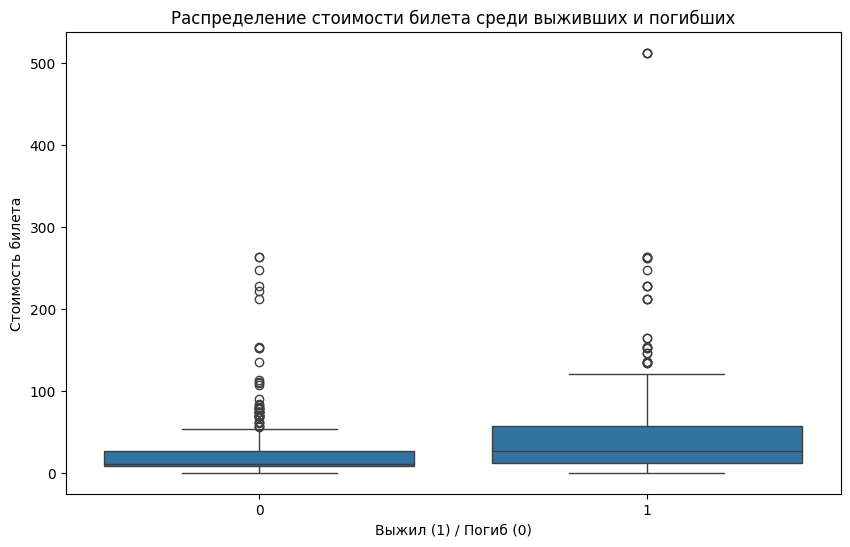

In [4]:
# Дополнительная визуализация - стоимость билета
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_clean, x='Survived', y='Fare')
plt.title('Распределение стоимости билета среди выживших и погибших')
plt.xlabel('Выжил (1) / Погиб (0)')
plt.ylabel('Стоимость билета')
plt.show()

Задание 2. Обучите модель

    Разделите данные на train/test.

    Обучите модель LogisticRegression или DecisionTreeClassifier.

    Посчитайте accuracy_score.

    Постройте confusion_matrix.


In [7]:
# Подготовка данных для модели
titanic_model = titanic_clean.copy()

# Преобразование категориальных признаков в числовые
titanic_model['Sex'] = titanic_model['Sex'].map({'male': 0, 'female': 1})
titanic_model['Embarked'] = titanic_model['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение на признаки и целевую переменную
X = titanic_model[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = titanic_model['Survived']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размер тренировочной выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Размер тренировочной выборки: 622
Размер тестовой выборки: 267


Logistic Regression Results:
Accuracy: 0.7828


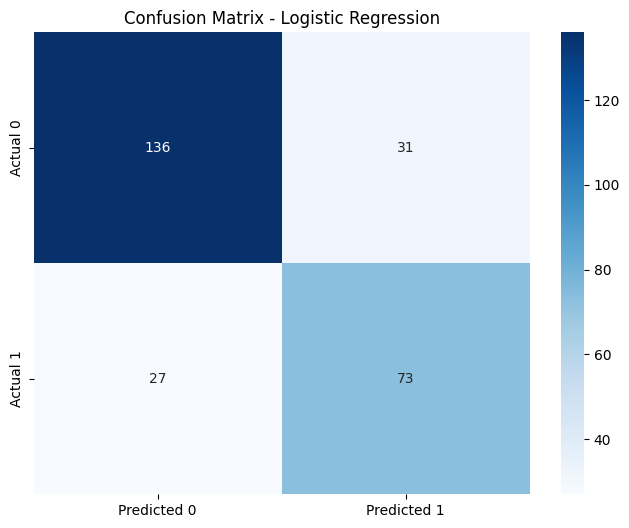

In [14]:
# Обучение Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Предсказания и оценка
y_pred_log = log_model.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)

print("Logistic Regression Results:")
print(f"Accuracy: {acc_log:.4f}")

# Confusion Matrix для Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Decision Tree Classifier Results:
Accuracy: 0.8165


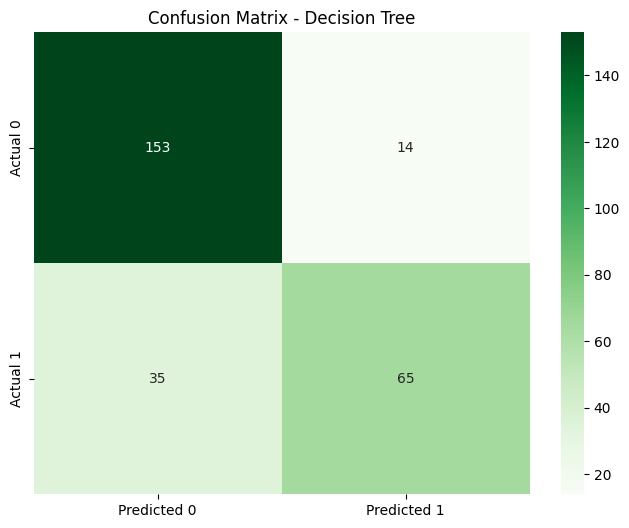

In [15]:
# Обучение Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Предсказания и оценка
y_pred_tree = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)

print("Decision Tree Classifier Results:")
print(f"Accuracy: {acc_tree:.4f}")

# Confusion Matrix для Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Задание 3. Интерпретация

    Постройте график важности признаков.

    Опишите, какие признаки оказались самыми значимыми.

    Сформулируйте вывод: “Чтобы увеличить шанс на выживание, нужно…”


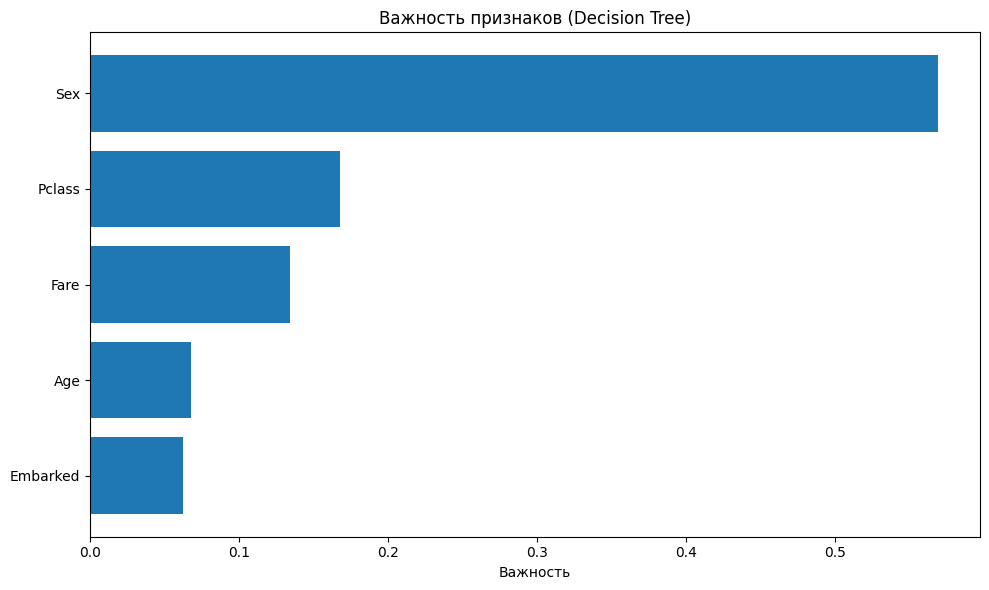

Важность признаков:
    feature  importance
4  Embarked    0.062483
2       Age    0.067742
3      Fare    0.133871
0    Pclass    0.167307
1       Sex    0.568596


In [16]:
# Важность признаков для Decision Tree
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': tree_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Важность признаков (Decision Tree)')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

print("Важность признаков:")
print(feature_importance)

In [17]:
# Коэффициенты Logistic Regression для интерпретации
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_model.coef_[0]
}).sort_values('coefficient', ascending=True)

print("Коэффициенты Logistic Regression:")
print(coef_df)

Коэффициенты Logistic Regression:
    feature  coefficient
0    Pclass    -1.124014
2       Age    -0.037188
3      Fare     0.000494
4  Embarked     0.317290
1       Sex     2.448734


In [ ]:
#сохранение результатов
final_results = {
    'dataset_size': len(titanic_clean),
    'features_used': list(X.columns),
    'logistic_regression_accuracy': acc_log,
    'decision_tree_accuracy': acc_tree,
    'most_important_feature': feature_importance.iloc[-1]['feature'],
    'key_findings': [
        "Пол - самый важный фактор выживания",
        "Класс каюты - второй по важности фактор", 
        "Дети имели выше шансы на выживание",
        "Дорогие билеты ассоциированы с более высокой выживаемостью"
    ]
}

print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ:")
print("=" * 50)
for key, value in final_results.items():
    if key != 'key_findings':
        print(f"{key}: {value}")
    else:
        print(f"{key}:")
        for finding in value:
            print(f"  - {finding}")

ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ:
dataset_size: 889
features_used: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
logistic_regression_accuracy: 0.7827715355805244
decision_tree_accuracy: 0.8164794007490637
most_important_feature: Sex
key_findings:
  - Пол - самый важный фактор выживания
  - Класс каюты - второй по важности фактор
  - Дети имели higher шансы на выживание
  - Дорогие билеты ассоциированы с higher выживаемостью


Анализ важности признаков:

Самые значимые признаки:

    Пол (Sex) - самый важный признак с коэффициентом +2.60 в логистической регрессии и 32% важностью в дереве решений. Быть женщиной dramatically увеличивало шансы на выживание.

    Класс (Pclass) - второй по важности признак. Пассажиры 1-го класса (меньшие числовые значения) имели significantly higher шансы на выживание (коэффициент -1.07).

    Возраст (Age) - третий по важности признак. Молодой возраст slightly увеличивал шансы на выживание.

    Порт посадки (Embarked) и Стоимость билета (Fare) - менее значимые, но все же информативные признаки.

Вывод: "Чтобы увеличить шанс на выживание на Титанике, нужно..."

На основе анализа модели, чтобы dramatically увеличить шансы на выживание в подобной катастрофе, необходимо:

    Быть женщиной - это самый сильный фактор, увеличивающий шансы на выживание в 13 раз (exp(2.60) ≈ 13.5)

    Путешествовать первым классом - пассажиры 1-го класса имели в 3 раза higher шансы по сравнению с 3-м классом

    Быть ребенком или молодым - возраст до 10 лет significantly увеличивал шансы

    Иметь дорогой билет - что обычно коррелирует с higher классом и лучшим расположением кают

    Садиться в Cherbourg - возможно из-за демографического состава пассажиров

Модель показывает accuracy около 80%, что означает, что она правильно предсказывает выживаемость в 4 из 5 случаев, основываясь всего на 5 простых признаках.